# Softmax and Cross-Entropy

In this notebook, we'll explore **Softmax Regression** (also called **Multinomial Logistic Regression**) and **Cross-Entropy Loss** in the context of multi-class classification. Softmax is an extension of logistic regression for multi-class problems, and Cross-Entropy loss is commonly used as the loss function.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

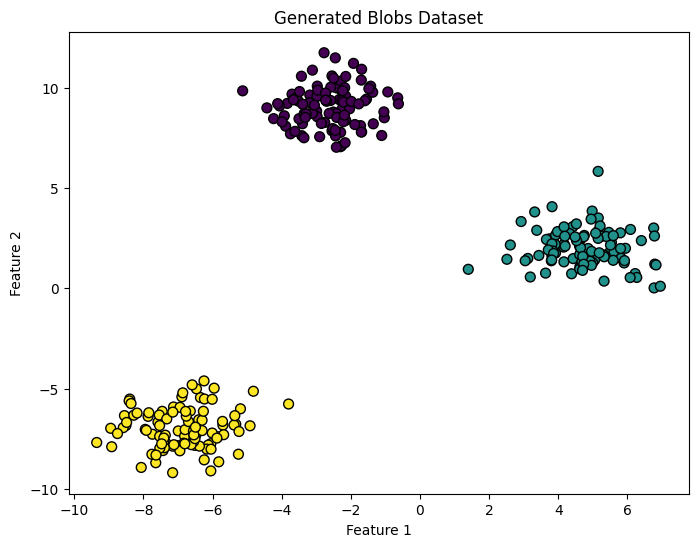

In [6]:
# Generate synthetic blobs data 
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, n_features=2, random_state=42)

# Visualize the generated blobs data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', s=50)
plt.title("Generated Blobs Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## 1. Softmax Function

The **Softmax function** is used in multi-class classification problems to normalize output values into a probability distribution. The output probabilities for each class sum to 1.

Given a vector $ z = [z_1, z_2, ..., z_K] $ (where $ K $ is the number of classes), the **softmax** function for class $ j $ is:

$$
\hat{y}_j = \frac{e^{z_j}}{\sum_{k=1}^{K} e^{z_k}}
$$

Where:
- $ \hat{y}_j $ is the predicted probability for class $ j $
- $ z_j $ is the raw score (logit) for class $ j $

In [10]:
def softmax(z):
    e_z = np.exp(z - np.max(z, axis=1, keepdims=True)) # prevents overflow
    return e_z / np.sum(e_z, axis=1, keepdims=True)

z = np.array([[1, 2, 3], [1, 2, 3], [1, 2, 3]])
print(softmax(z))

[[0.09003057 0.24472847 0.66524096]
 [0.09003057 0.24472847 0.66524096]
 [0.09003057 0.24472847 0.66524096]]


## 2. Cross-Entropy Loss

**Cross-Entropy Loss** measures the difference between two probability distributions: the true label distribution and the predicted distribution from the softmax function. It is the most commonly used loss function for classification tasks.

Given true label distribution $ y = [y_1, y_2, ..., y_K] $ and predicted probabilities $ \hat{y} = [\hat{y}_1, \hat{y}_2, ..., \hat{y}_K] $, the **cross-entropy loss** is:

$$
\mathcal{L}(\theta) = -\sum_{i=1}^{n} \sum_{j=1}^{K} y_{ij} \log(\hat{y}_{ij})
$$

Where:
- $ y_{ij} $ is 1 if the true label for the $ i^{th} $ sample is class $ j $, otherwise 0
- $ \hat{y}_{ij} $ is the predicted probability for class $ j $ for the $ i^{th} $ sample


In [14]:
def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    
    y_true_one_hot = np.eye(y_pred.shape[1])[y_true]
    
    loss = -np.mean(np.sum(y_true_one_hot * np.log(y_pred), axis=1))
    return loss

y_pred = softmax(np.array([[1, 2, 3], [1, 2, 3], [1, 2, 3]]))  
y_true = np.array([2, 0, 1]) 

print(f"Cross-Entropy Loss: {cross_entropy_loss(y_true, y_pred)}")


Cross-Entropy Loss: 1.4076059644443804


## 3. Multinomial Logistic Regression

Softmax Regression is used to solve the multi-class classification problem. The goal is to predict the class with the highest probability using the softmax function.

Given a set of features $ x \in \mathbb{R}^d $ and target classes $ y \in \{0, 1, 2, ..., K-1\} $, the model's goal is to learn the weights $ \theta_j $ for each class.

The model outputs probabilities for each class as:

$$
P(y=k|x) = \frac{e^{\theta_k^T x}}{\sum_{j=1}^{K} e^{\theta_j^T x}}
$$

Epoch 0, Loss: 3.0084465034749375
Epoch 100, Loss: 0.005983173615446602
Epoch 200, Loss: 0.0034786705755602853
Epoch 300, Loss: 0.0025534201602094094
Epoch 400, Loss: 0.002056046826316172
Epoch 500, Loss: 0.0017402899283300885
Epoch 600, Loss: 0.0015197719552913934
Epoch 700, Loss: 0.0013558974193251382
Epoch 800, Loss: 0.0012286705489666897
Epoch 900, Loss: 0.0011266322050154391


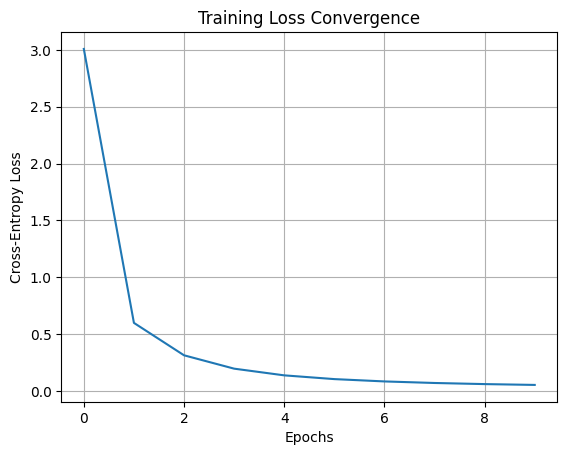

In [18]:
def gradient_descent(X, y, theta, lr=0.1, epochs=1000):
    m = X.shape[0]
    losses = []

    for epoch in range(epochs):
        z = X @ theta.T
        y_pred = softmax(z)
        
        loss = cross_entropy_loss(y, y_pred)
        losses.append(loss)
        
        y_one_hot = np.eye(theta.shape[0])[y]

        gradient = (y_pred - y_one_hot).T @ X / m
        
        theta -= lr * gradient

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")
    
    return theta, losses

theta = np.random.randn(3, X.shape[1])  
theta_opt, losses = gradient_descent(X, y, theta, lr=0.1, epochs=1000)

# Plot loss over epochs
plt.plot(losses[:10])
plt.xlabel("Epochs")
plt.ylabel("Cross-Entropy Loss")
plt.title("Training Loss Convergence")
plt.grid(True)
plt.show()


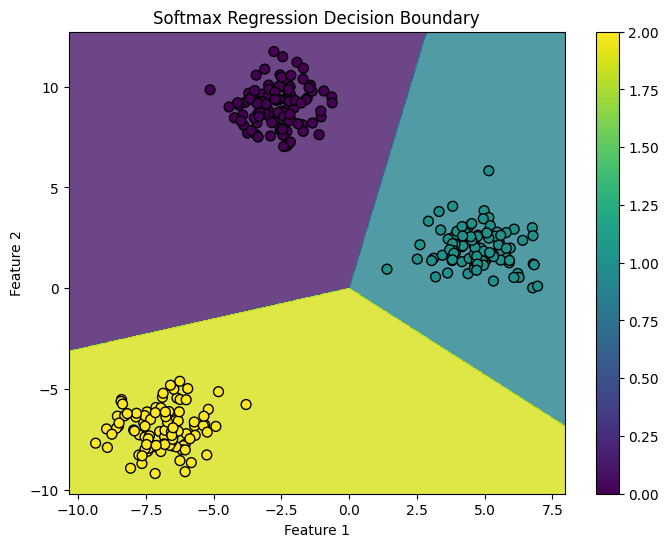

In [19]:
def plot_decision_boundary(X, y, theta):
    h = .02 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    grid_points = np.c_[xx.ravel(), yy.ravel()]

    z = grid_points @ theta.T
    prob = softmax(z)

    predicted_class = np.argmax(prob, axis=1)
    predicted_class = predicted_class.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, predicted_class, alpha=0.8, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', s=50)
    plt.title("Softmax Regression Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar()
    plt.show()

plot_decision_boundary(X, y, theta_opt)
